# Logistic Regression and Fractal Geometry

This Jupyter Notebook was made for the final project in the class "Classical Mechanics 2" and we focus on the use of non linear equations to estimate the beahavior of future COVID cases in Costa Rica. 

We used a logistic regression model to predict future COVID cases and we also used fractal geometry to make a map of COVID cases in the GAM (Grand Metropolitan Area) and calculated the Minkowski-Boulingand dimension in order to compare this value with other countries like Italy, Spain and Germany.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.misc
from scipy.optimize import curve_fit
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegressionCV
from statsmodels.tools.tools import add_constant
import imageio
from IPython.display import Image, display

The data from a text file is stored in dataframes. This data were recompiled from the webpage of the Ministry of Health of Costa Rica. 

The data used is the total cases since the first case detected in Costa Rica (6/03/2020) to the first of November of 2020.

In [2]:
#Load the path with the txt file with the data
path_file_data = 'C:/Users/tiqui/OneDrive/Carpeta Fran Escritorio/Projects/Logistic Regression COVID-19/Total_COVID_Cases_Data.txt'

#Path with the contagion map (Made using Geogebra)
path_contagion_map = 'C:/Users/tiqui/OneDrive/Carpeta Fran Escritorio/Projects/Logistic Regression COVID-19/Contagion_Map.png'

#Path used to save the different plots of the results
path_save_plots = 'C:/Users/tiqui/OneDrive/Carpeta Fran Escritorio/Projects/Logistic Regression COVID-19/'

df = pd.read_csv(path_file_data, sep="\t", header=0)
df.head()

,Day,Date,Total_Cases
0,0,3/6/2020,1
1,1,3/7/2020,5
2,2,3/8/2020,9
3,3,3/9/2020,9
4,4,3/10/2020,13


###  Logistic Regression Model 

The logistic function utilize for the model is the following:

$f(x) = \frac{L}{1+e^{-k(x-x_{0})}}$

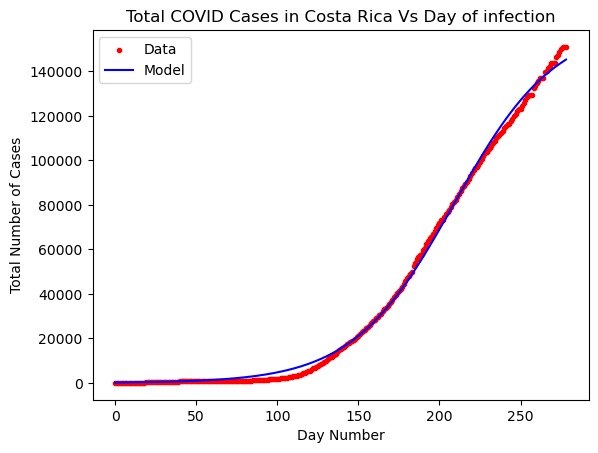

 
L: 161151.92011258457 
k: 0.03206796482962551 
x_0: 209.02952083664852
R2 Score: 0.9982921393855558


In [3]:
#Define the logistic function
def logistic_func(x, L, k, x_0):
    func = L/(1+np.exp(-k*(x-x_0)))
    return func

cases = df['Total_Cases'].to_numpy()
day = df['Day'].to_numpy()

popt, pcov = curve_fit(logistic_func, day, cases, [1, 0.2, 0])

y_model = logistic_func(day, *popt)

#Plot with the data and the model
plt1 = plt.scatter(x = df['Day'], y = df['Total_Cases'], marker='.', label='Data', color='red')
plt2 = plt.plot(day, y_model, label='Model', color='blue')
plt.title('Total COVID Cases in Costa Rica Vs Day of infection')
plt.ylabel('Total Number of Cases')
plt.xlabel('Day Number')
plt.legend(prop={'size': 10}, loc=2)
#plt.savefig(path_all+'Data.png',dpi=300,bbox_inches='tight')
plt.show()

print('', '\nL:', popt[0], '\nk:', popt[1], '\nx_0:', popt[2])

# Evaluate the model with the R2 Score metric
r2 = r2_score(cases, y_model)
print('R2 Score:', r2)

### Model Evaluation

For the evaluation of the model, we split the data in a 80:20 relation, for training and testing respectively.

We use three different metrics to estimate the accuracy of the model

In [4]:
# Splitting training and testing data for a model accuracy test
L = np.random.rand(len(df)) < 0.8 #80% training data
train_x = df['Day'][L]
test_x = df['Day'][~L]
train_y = df['Total_Cases'][L]
test_y = df['Total_Cases'][~L]
 
# Construction of the model
popt, pcov = curve_fit(logistic_func, train_x, train_y, [1, 0.2, 0])

# Prediction with testing values
y_model = logistic_func(test_x, *popt)
    
# Evaluated the model by different metrics
mean_abs_error = np.mean(np.absolute(y_model - test_y))
mean_sqr_error = np.mean(( test_y - y_model)**2)
r2 = r2_score(y_model, test_y)

print('Mean Absolute Error:', mean_abs_error, '\nMean Square Error (MSE):', mean_sqr_error, '\nR2 Score:', r2)

Mean Absolute Error: 1524.295579015968 
Mean Square Error (MSE): 4382280.749092295 
R2 Score: 0.9982539905548315


### Cross-Validation

We perform cross-validation to validate the stability of the model create using logistic regression.

Once again, we use three different metrics to estimate the accuracy of the model

In [11]:
train_x = np.array(train_x).reshape(-1,1)
test_x = np.array(test_x).reshape(-1,1)
train_y = np.array(train_y).reshape(-1,1)
test_y = np.array(test_y).reshape(-1,1)

lr_cv_model = LogisticRegressionCV(n_jobs=1, random_state=0, cv=5, refit=False, class_weight="balanced").fit(train_x, train_y.ravel())

lr_cv_predict_train = lr_cv_model.predict(train_x)

# View the accuracy of the model against the training data.  Y_train are the known class values,
# and lr_cv_predict_train are the predicted class values for the same features.
print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(train_y, lr_cv_predict_train)))
print()

# Predict values using the test data
lr_cv_predict_test = lr_cv_model.predict(test_x)

print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(test_y lr_cv_predict_test)))
print()

print("Confusion Matrix")
print(metrics.confusion_matrix(test_y, lr_cv_predict_test))
print()

print("Classification Report")
print(metrics.classification_report(test_y, lr_cv_predict_test))
print()

ValueError: n_splits=5 cannot be greater than the number of members in each class.

### Fractal Dimension

We calculated the fractal dimension of the map of contagion in the GAM

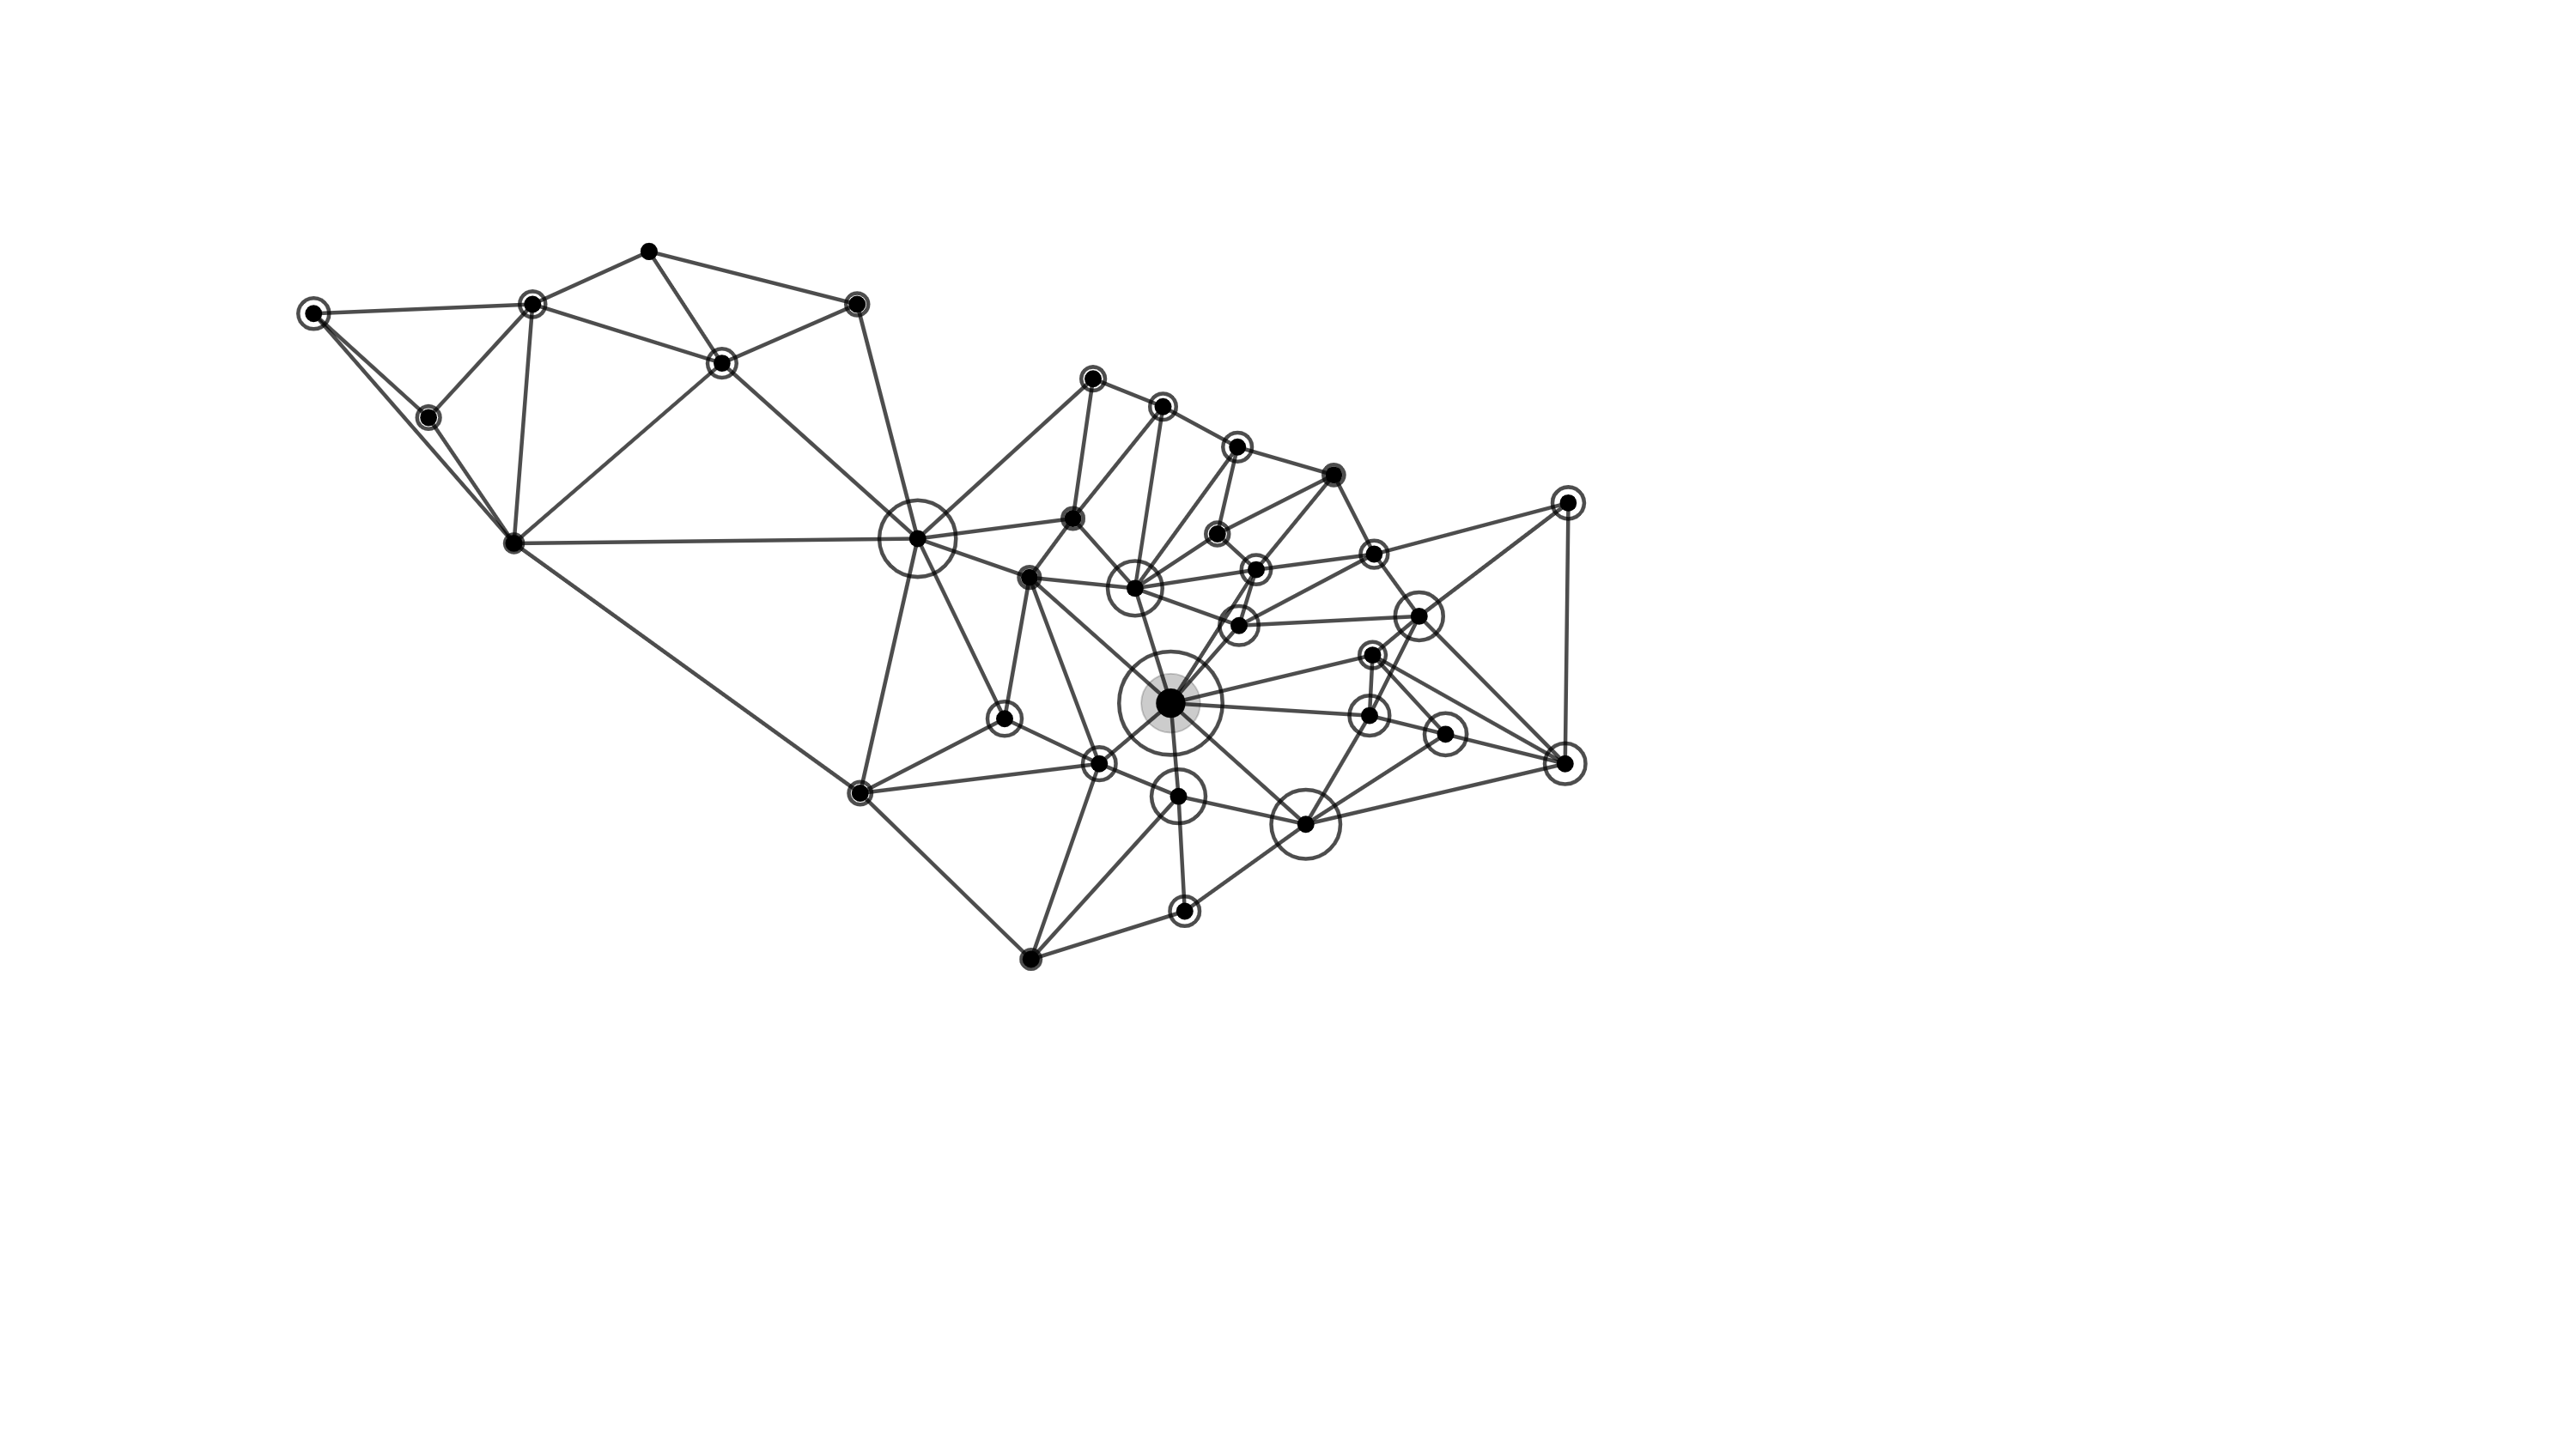

C:\Users\tiqui\AppData\Local\Temp\ipykernel_5080\2944701656.py:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  I = rgb2gray(imageio.imread(path_contagion_map))


Minkowski–Bouligand Dimension:  0.8785022456683854


In [5]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def fractal_dimension(Z, threshold=0.9):
    assert(len(Z.shape) == 2)
    def boxcount(Z, k):
        S = np.add.reduceat(np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0), np.arange(0, Z.shape[1], k), axis=1)
        return len(np.where((S > 0) & (S < k*k))[0])

    Z = (Z < threshold)
    p = min(Z.shape)
    n = 2**np.floor(np.log(p)/np.log(2))
    n = int(np.log(n)/np.log(2))
    sizes = 2**np.arange(n, 1, -1)
    counts = []
    
    for size in sizes:
        counts.append(boxcount(Z, size))

    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

display(Image(path_contagion_map))
I = rgb2gray(imageio.imread(path_contagion_map))
print("Minkowski–Bouligand Dimension: ", fractal_dimension(I))